In [1]:
import os
os.chdir('../')

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
from src.utils import set_size_and_get_figsize

/tmp/ipykernel_6769/881982797.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [3]:
def moving_average(data, window_size):
    return data.rolling(window=window_size).mean()

In [4]:
episodic_length_data = pd.read_csv('data/training/20240317-112025_length.csv')
episodic_return_data = pd.read_csv('data/training/20240317-112025_return.csv')
q_values_data = pd.read_csv('data/training/20240317-112025_qvalues.csv')
td_loss_data = pd.read_csv('data/training/20240317-112025_tdloss.csv')

# Calculate the moving average for each dataset
window_size = 32
episodic_length_data['MA'] = moving_average(episodic_length_data['Value'], window_size)
episodic_return_data['MA'] = moving_average(episodic_return_data['Value'], window_size)
q_values_data['MA'] = moving_average(q_values_data['Value'], window_size)
td_loss_data['MA'] = moving_average(td_loss_data['Value'], window_size)

In [5]:
human_scores = [19.66, 16.5, 7, 5, 12.3, 2.44, 9.13, 6, 11.6, 6, 9.9, 12.11, 10.2, 8, 2.1]
random_mean_score = 2.1
mean_human_score = sum(human_scores) / len(human_scores)

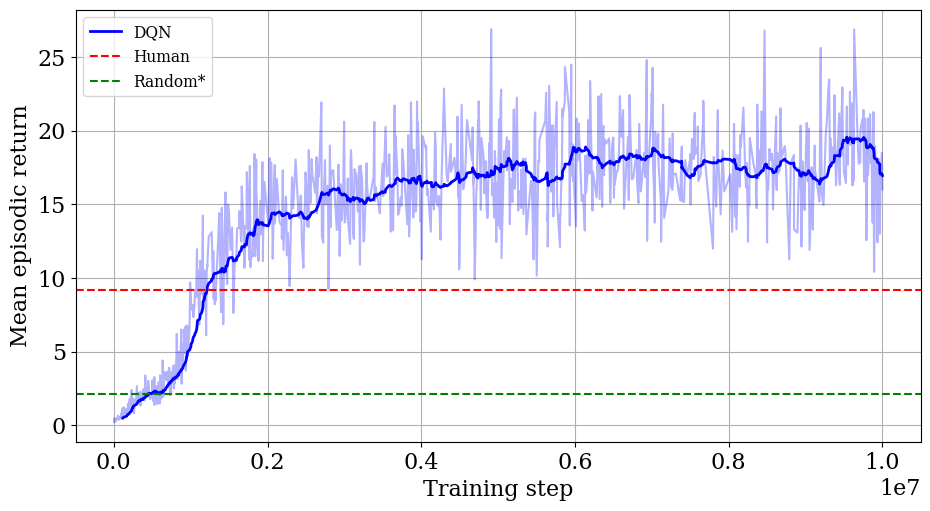

In [6]:
plt.figure(figsize=set_size_and_get_figsize(1))
plt.plot(episodic_return_data['Step'], episodic_return_data['Value'], alpha=0.3, color='blue')
plt.plot(episodic_return_data['Step'], episodic_return_data['MA'], color='blue', label='DQN', linewidth=2)
plt.axhline(y=mean_human_score, color='r', linestyle='--', label='Human')
plt.axhline(y=random_mean_score, color='green', linestyle='--', label='Random*')
plt.xlabel('Training step')
plt.ylabel('Mean episodic return')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.savefig('figures/DQN episodic return.png')
plt.show()

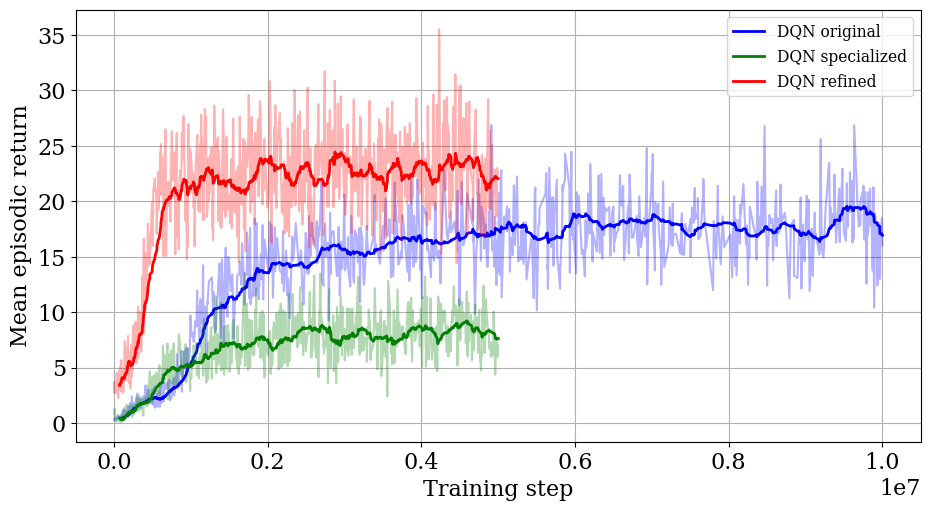

In [7]:
data_original = episodic_return_data
data_specialized = pd.read_csv('data/training/20240321-223500.csv')
data_refined = pd.read_csv('data/training/20240322-100656.csv')

# Calculate the moving average for new models
data_specialized['MA'] = moving_average(data_specialized['Value'], window_size)
data_refined['MA'] = moving_average(data_refined['Value'], window_size)

plt.figure(figsize=set_size_and_get_figsize(1))
plt.plot(data_original['Step'], data_original['Value'], color='blue', alpha=0.3)
plt.plot(data_original['Step'], data_original['MA'], color='blue', label='DQN original', linewidth=2)

plt.plot(data_specialized['Step'], data_specialized['Value'], color='green', alpha=0.3)
plt.plot(data_specialized['Step'], data_specialized['MA'], color='green', label='DQN specialized', linewidth=2)

plt.plot(data_refined['Step'], data_refined['Value'],  color='red', alpha=0.3)
plt.plot(data_refined['Step'], data_refined['MA'], color='red', label='DQN refined', linewidth=2)

#plt.axhline(y=mean_human_score, color='black', linestyle='--', label='Human')
#plt.axhline(y=random_mean_score, color='purple', linestyle='--', label='Random*')

plt.xlabel('Training step')
plt.ylabel('Mean episodic return')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.savefig('figures/DQN refinement.png')
plt.show()

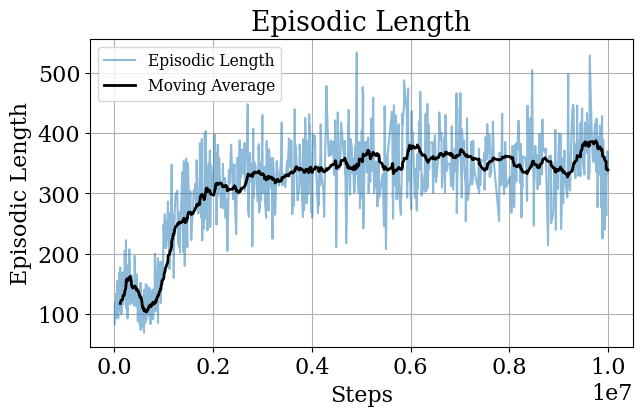

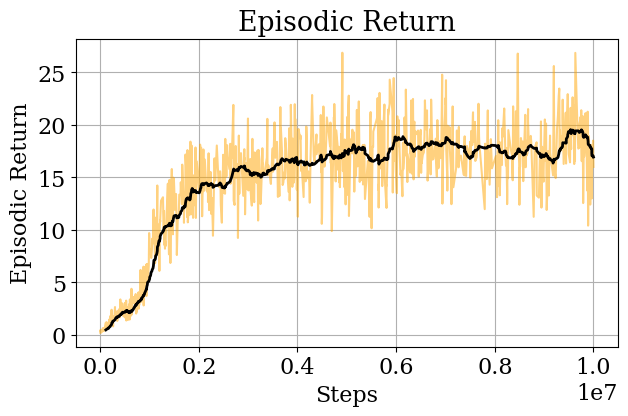

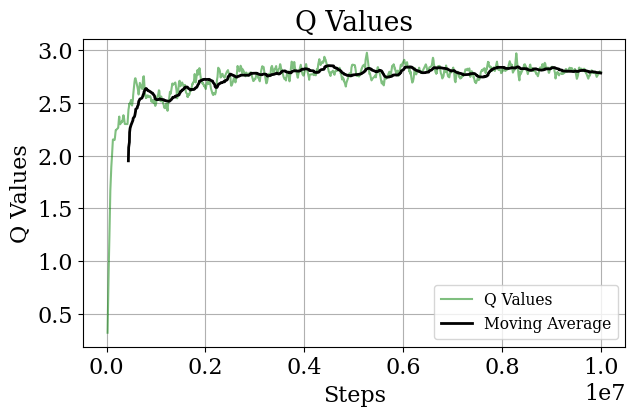

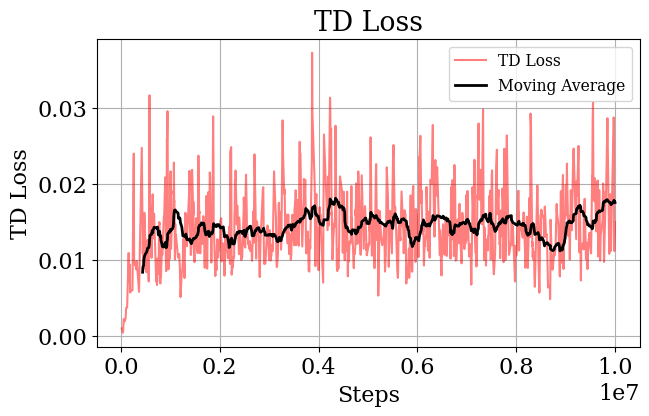

In [8]:
plt.figure(figsize=(7, 4))
plt.plot(episodic_length_data['Step'], episodic_length_data['Value'], label='Episodic Length', alpha=0.5)
plt.plot(episodic_length_data['Step'], episodic_length_data['MA'], label='Moving Average', color='black', linewidth=2)
plt.xlabel('Steps')
plt.ylabel('Episodic Length')
plt.title('Episodic Length')
plt.legend()
plt.grid(True)
plt.savefig('figures/episodic_length.png')
plt.show()

plt.figure(figsize=(7, 4))
plt.plot(episodic_return_data['Step'], episodic_return_data['Value'], label='Episodic Return', alpha=0.5, color='orange')
plt.plot(episodic_return_data['Step'], episodic_return_data['MA'], label='Moving Average', color='black', linewidth=2)
plt.xlabel('Steps')
plt.ylabel('Episodic Return')
plt.title('Episodic Return')
plt.grid(True)
plt.savefig('figures/episodic_return.png')
plt.show()

plt.figure(figsize=(7, 4))
plt.plot(q_values_data['Step'], q_values_data['Value'], label='Q Values', alpha=0.5, color='green')
plt.plot(q_values_data['Step'], q_values_data['MA'], label='Moving Average', color='black', linewidth=2)
plt.xlabel('Steps')
plt.ylabel('Q Values')
plt.title('Q Values')
plt.legend()
plt.grid(True)
plt.savefig('figures/q_values.png')
plt.show()

plt.figure(figsize=(7, 4))
plt.plot(td_loss_data['Step'], td_loss_data['Value'], label='TD Loss', alpha=0.5, color='red')
plt.plot(td_loss_data['Step'], td_loss_data['MA'], label='Moving Average', color='black', linewidth=2)
plt.xlabel('Steps')
plt.ylabel('TD Loss')
plt.title('TD Loss')
plt.legend()
plt.grid(True)
plt.savefig('figures/td_loss.png')
plt.show()